# Problem 1

**You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
import scipy.stats as stats
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf


from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
filterwarnings('ignore')

**Data Dictionary**

In [2]:
dd1 = pd.read_csv('Problem1_DD.csv')
dd1

,Variable Name,Description
0,Carat,�Carat weight of the cubic zirconia.
1,Cut,�Describe the cut quality of the cubic zirconi...
2,Color�,�Colour of the cubic zirconia.With D being the...
3,Clarity,Clarity refers to the absence of the Inclusion...
4,Depth,"�The Height of cubic zirconia, measured from t..."
5,Table,�The Width of the cubic zirconia's Table expre...
6,Price,�the Price of the cubic zirconia.
7,X,�Length of the cubic zirconia in mm.
8,Y,�Width of the cubic zirconia in mm.
9,Z,�Height of the cubic zirconia in mm.


**1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.**

In [3]:
df = pd.read_csv('cubic_zirconia.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


**Checking the data type and the shape of the dataset**

In [6]:
df.shape

(26967, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


**Data Description**

In [8]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


**Checking if any Null/Missing values in the dataset**

In [9]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [10]:
100 * df.isnull().sum() / len(df)

carat      0.00000
cut        0.00000
color      0.00000
clarity    0.00000
depth      2.58464
table      0.00000
x          0.00000
y          0.00000
z          0.00000
price      0.00000
dtype: float64

**Checking duplicate entries if any present in the dataset**

In [11]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


**unique values for categorical and numerical variables**

In [12]:
for column in df.columns:
    if df[column].dtype == 'object':
        print('\n')
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        



CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64


In [13]:
df[['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']].nunique()

carat     257
depth     169
table     112
x         531
y         526
z         356
price    8742
dtype: int64

**Univariate / Bivariate analysis**

**For Numerical Variables**

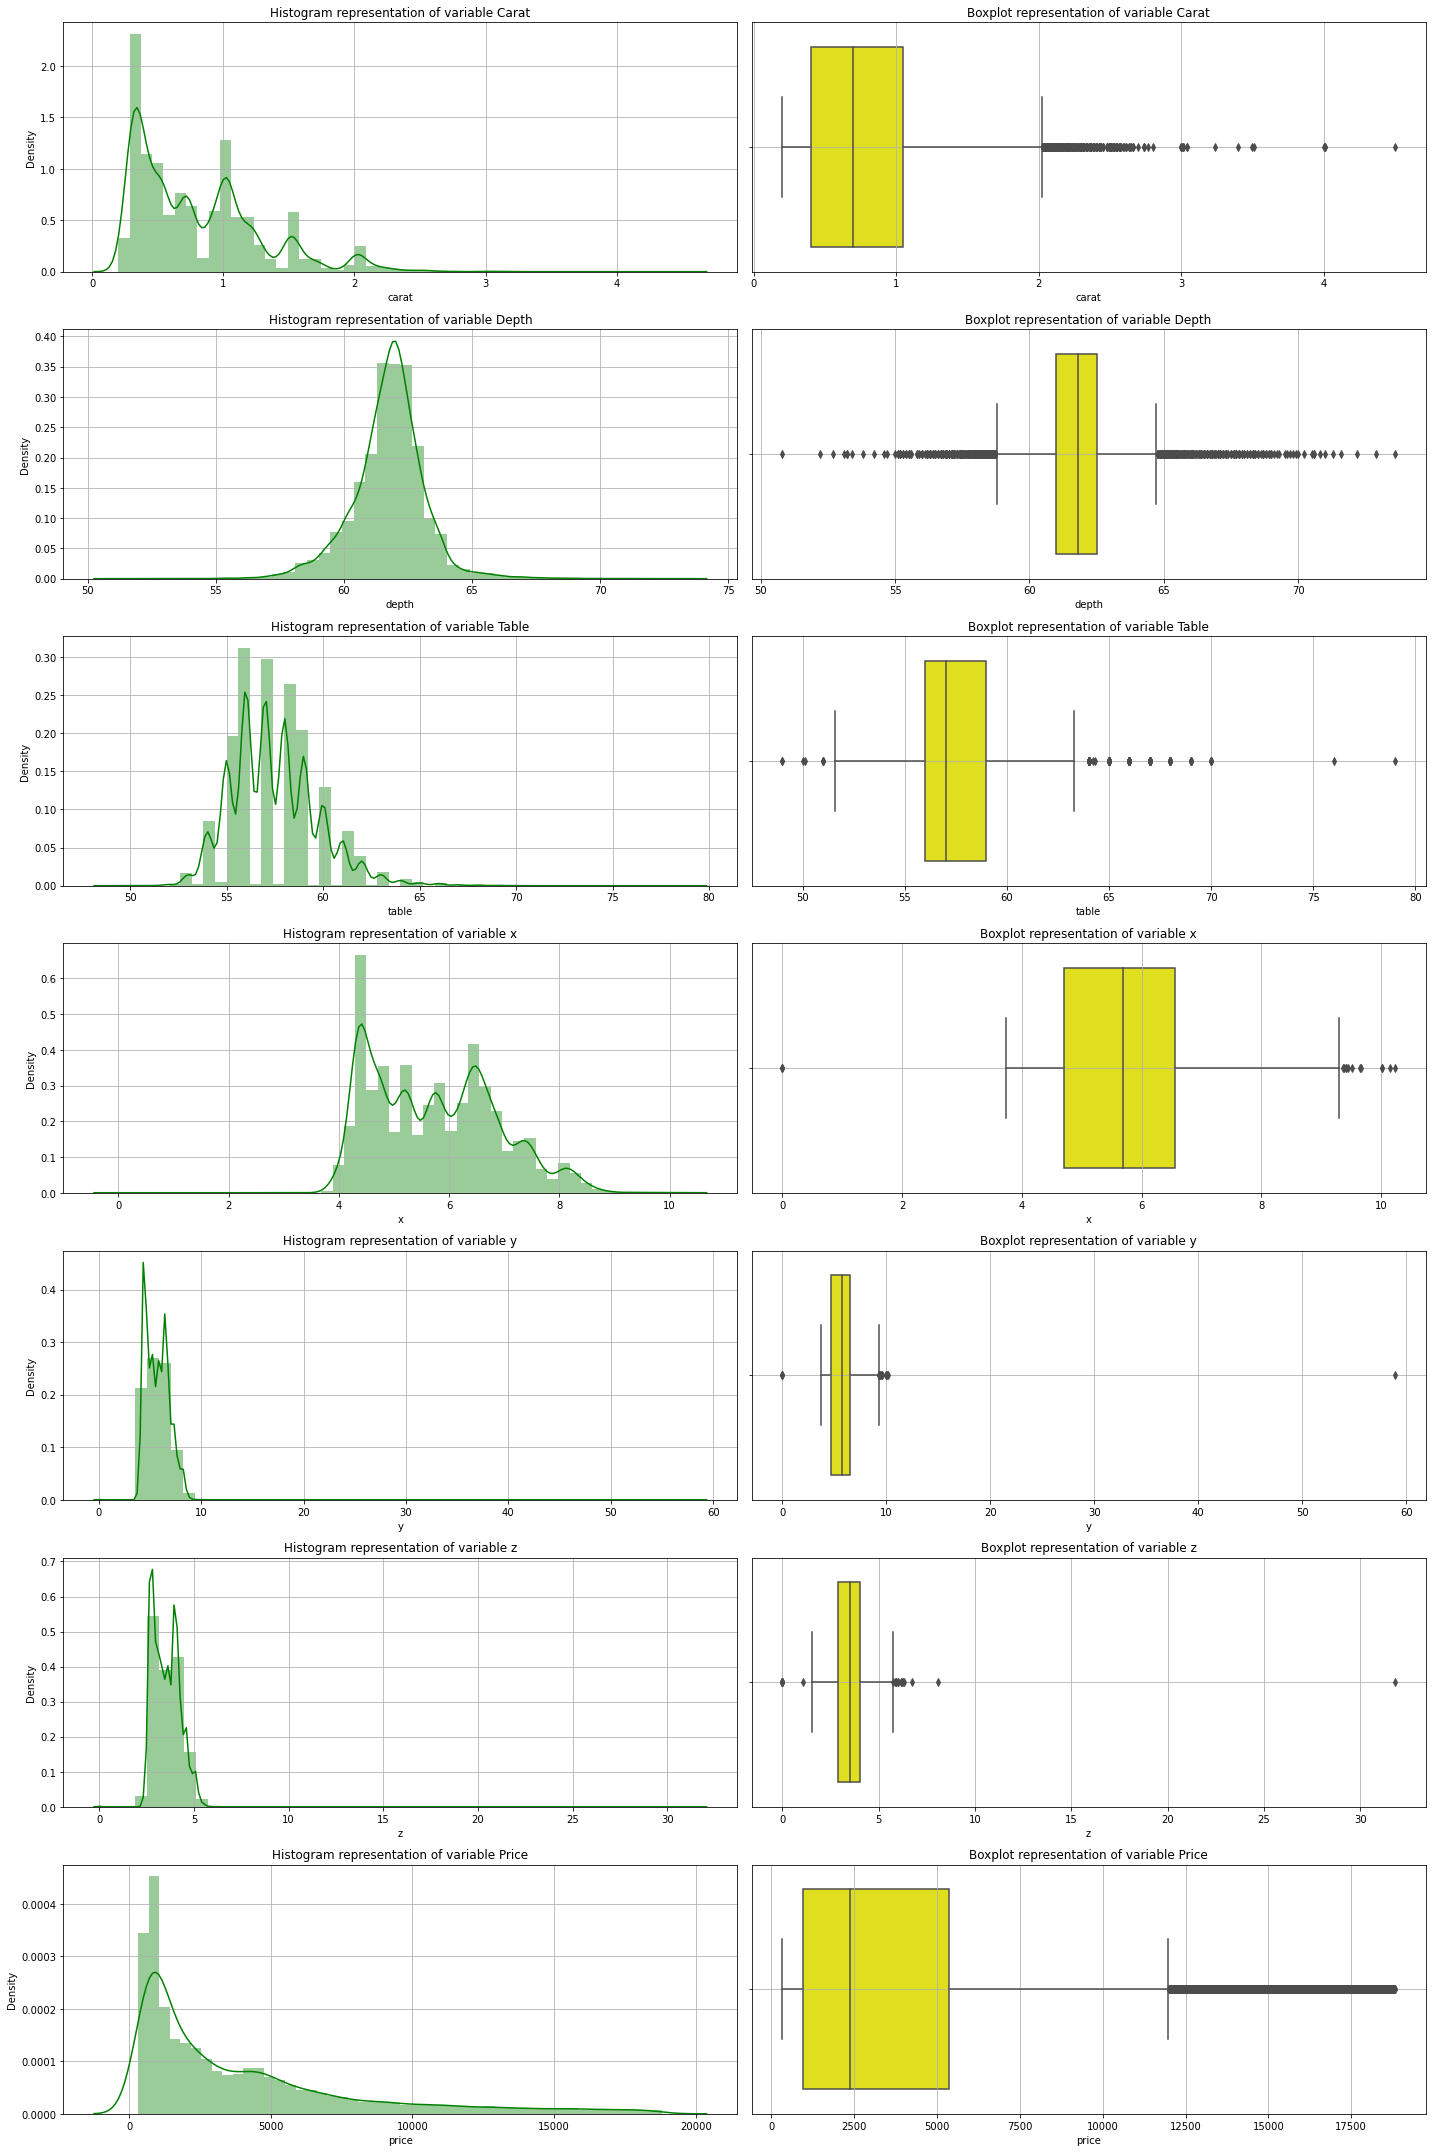

In [14]:
plt.figure(figsize = (20,30))

plt.subplot(7,2,1)
sns.distplot(df.carat, color = 'g')
plt.title('Histogram representation of variable Carat')
plt.grid()
plt.subplot(7,2,2)
sns.boxplot(df.carat, color = 'yellow')
plt.title('Boxplot representation of variable Carat')
plt.grid()

plt.subplot(7,2,3)
sns.distplot(df.depth, color = 'g')
plt.grid()
plt.title('Histogram representation of variable Depth')
plt.subplot(7,2,4)
sns.boxplot(df.depth,color = 'yellow')
plt.title('Boxplot representation of variable Depth')
plt.grid()

plt.subplot(7,2,5)
sns.distplot(df.table, color = 'g')
plt.title('Histogram representation of variable Table')
plt.grid()
plt.subplot(7,2,6)
sns.boxplot(df.table, color = 'yellow')
plt.title('Boxplot representation of variable Table')
plt.grid()

plt.subplot(7,2,7)
sns.distplot(df.x, color = 'g')
plt.title('Histogram representation of variable x')
plt.grid()
plt.subplot(7,2,8)
sns.boxplot(df.x,color = 'yellow')
plt.title('Boxplot representation of variable x')
plt.grid()

plt.subplot(7,2,9)
sns.distplot(df.y,color = 'g')
plt.title('Histogram representation of variable y')
plt.grid()
plt.subplot(7,2,10)
sns.boxplot(df.y,color = 'yellow')
plt.title('Boxplot representation of variable y')
plt.grid()

plt.subplot(7,2,11)
sns.distplot(df.z,color = 'g')
plt.title('Histogram representation of variable z')
plt.grid()
plt.subplot(7,2,12)
sns.boxplot(df.z, color = 'yellow')
plt.title('Boxplot representation of variable z')
plt.grid()

plt.subplot(7,2,13)
sns.distplot(df.price, color = 'g')
plt.title('Histogram representation of variable Price')
plt.grid()
plt.subplot(7,2,14)
sns.boxplot(df.price, color = 'yellow')
plt.title('Boxplot representation of variable Price')
plt.grid()

plt.tight_layout()
plt.show()

In [15]:
df.skew()

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

**For Categorical Variables**

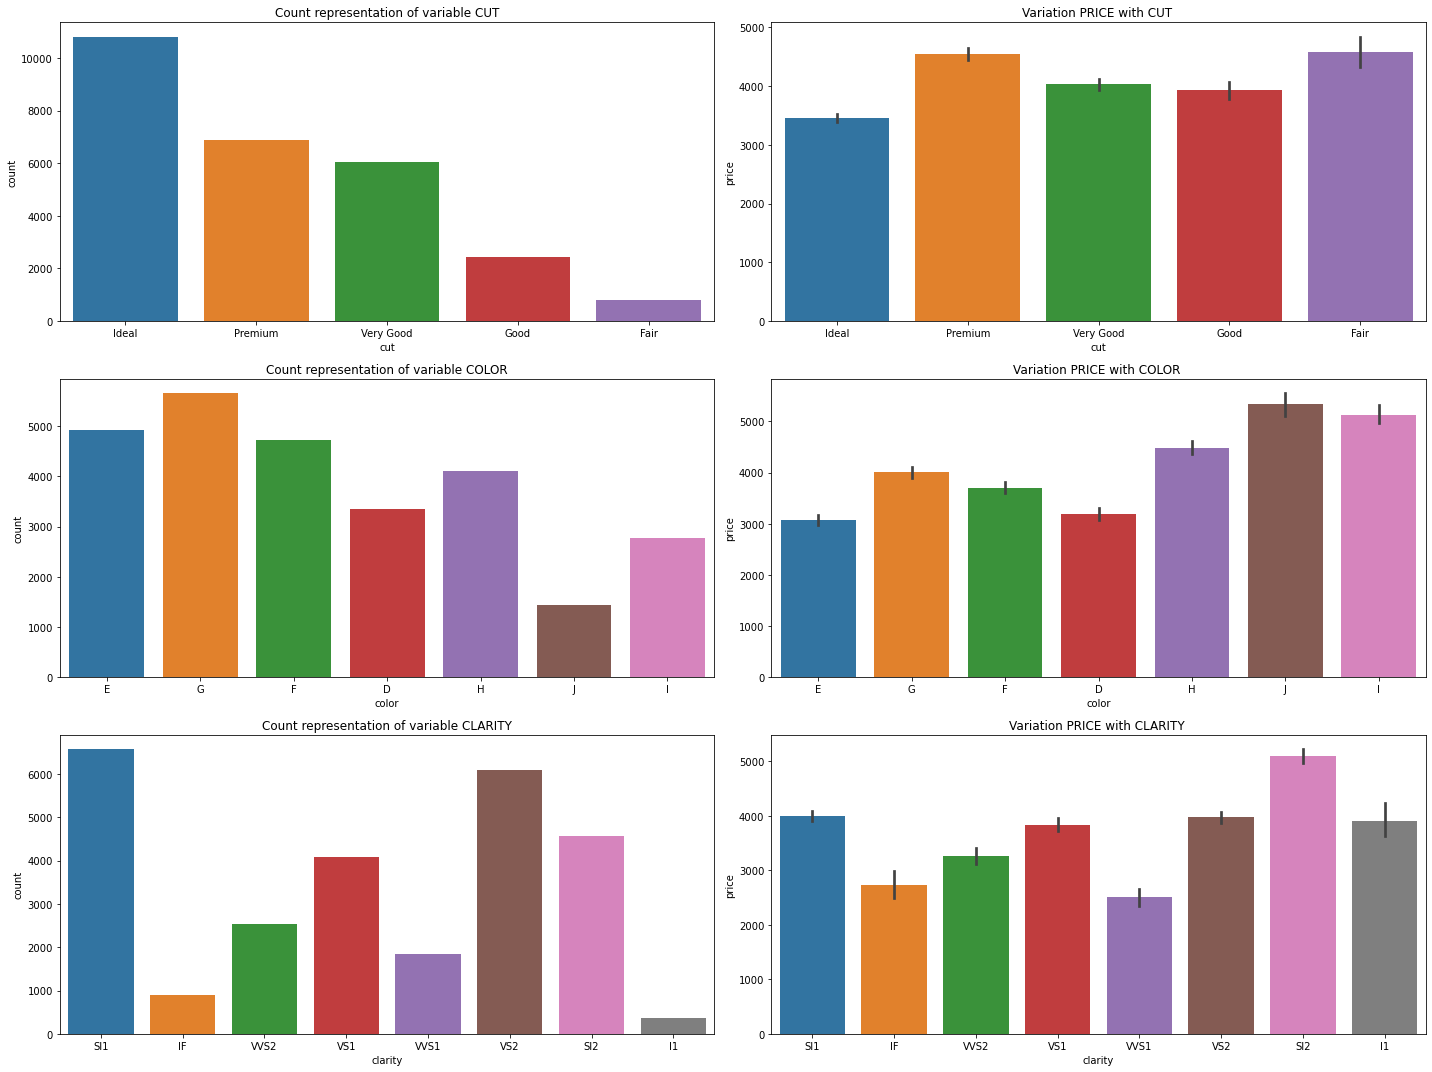

In [16]:
plt.figure(figsize = (20,15))

plt.subplot(3,2,1)
sns.countplot(df['cut'])
plt.title('Count representation of variable CUT')

plt.subplot(3,2,2)
sns.barplot(data = df, x='cut',y='price')
plt.title('Variation PRICE with CUT ')

plt.subplot(3,2,3)
sns.countplot(df['color'])
plt.title('Count representation of variable COLOR')

plt.subplot(3,2,4)
sns.barplot(data = df, x='color',y='price' )
plt.title('Variation PRICE with COLOR ')

plt.subplot(3,2,5)
sns.countplot(df['clarity'])
plt.title('Count representation of variable CLARITY')

plt.subplot(3,2,6)
sns.barplot(data = df, x='clarity',y='price')
plt.title('Variation PRICE with CLARITY ')

plt.tight_layout()
plt.show()

In [17]:
pd.crosstab(df['cut'], df['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,74,100,148,147,150,94,68
Good,311,491,454,419,352,253,161
Ideal,1409,1966,1893,2470,1552,1073,453
Premium,808,1174,1167,1471,1161,711,407
Very Good,742,1186,1067,1154,887,640,354


In [18]:
pd.crosstab(df['cut'], df['clarity'])

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,89,4,193,225,93,129,10,38
Good,51,30,765,530,331,491,100,143
Ideal,74,613,2150,1324,1784,2528,1036,1307
Premium,108,115,1809,1449,998,1697,307,416
Very Good,43,132,1654,1047,887,1254,386,627


In [19]:
pd.crosstab(df['clarity'], df['color'])

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,25,54,67,68,82,48,21
IF,38,87,183,342,149,69,26
SI1,1040,1249,1088,1001,1082,725,386
SI2,671,849,753,779,796,469,258
VS1,369,625,672,1078,595,480,274
VS2,804,1202,1107,1205,804,603,374
VVS1,121,342,360,507,288,183,38
VVS2,276,509,499,681,306,194,66


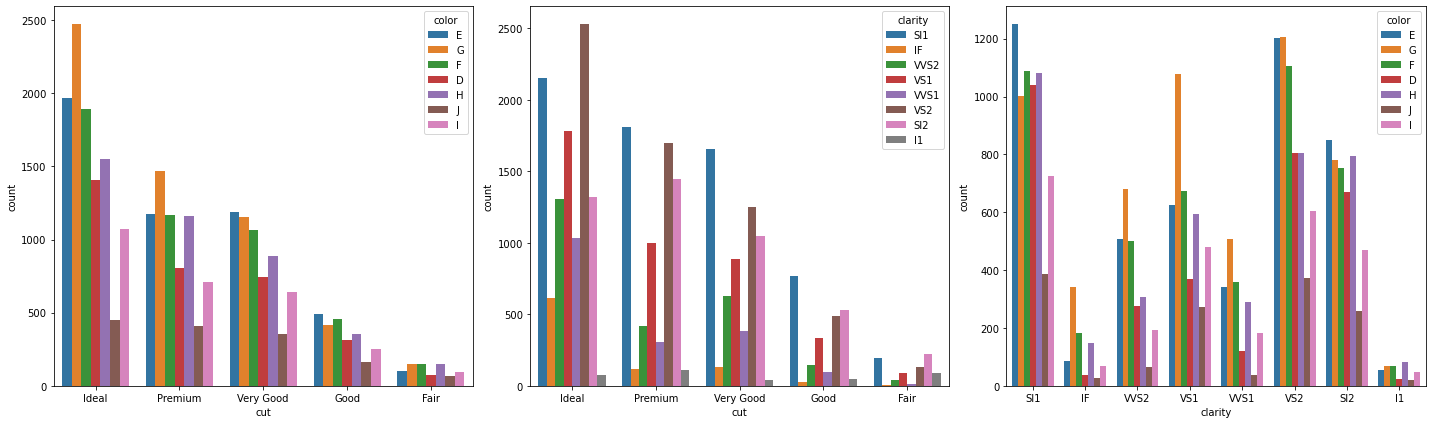

In [20]:
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
sns.countplot(x = 'cut', hue = 'color', data = df)

plt.subplot(1,3,2)
sns.countplot(x = 'cut', hue = 'clarity', data = df)

plt.subplot(1,3,3)
sns.countplot(x = 'clarity', hue = 'color', data = df)

plt.tight_layout()
plt.show()

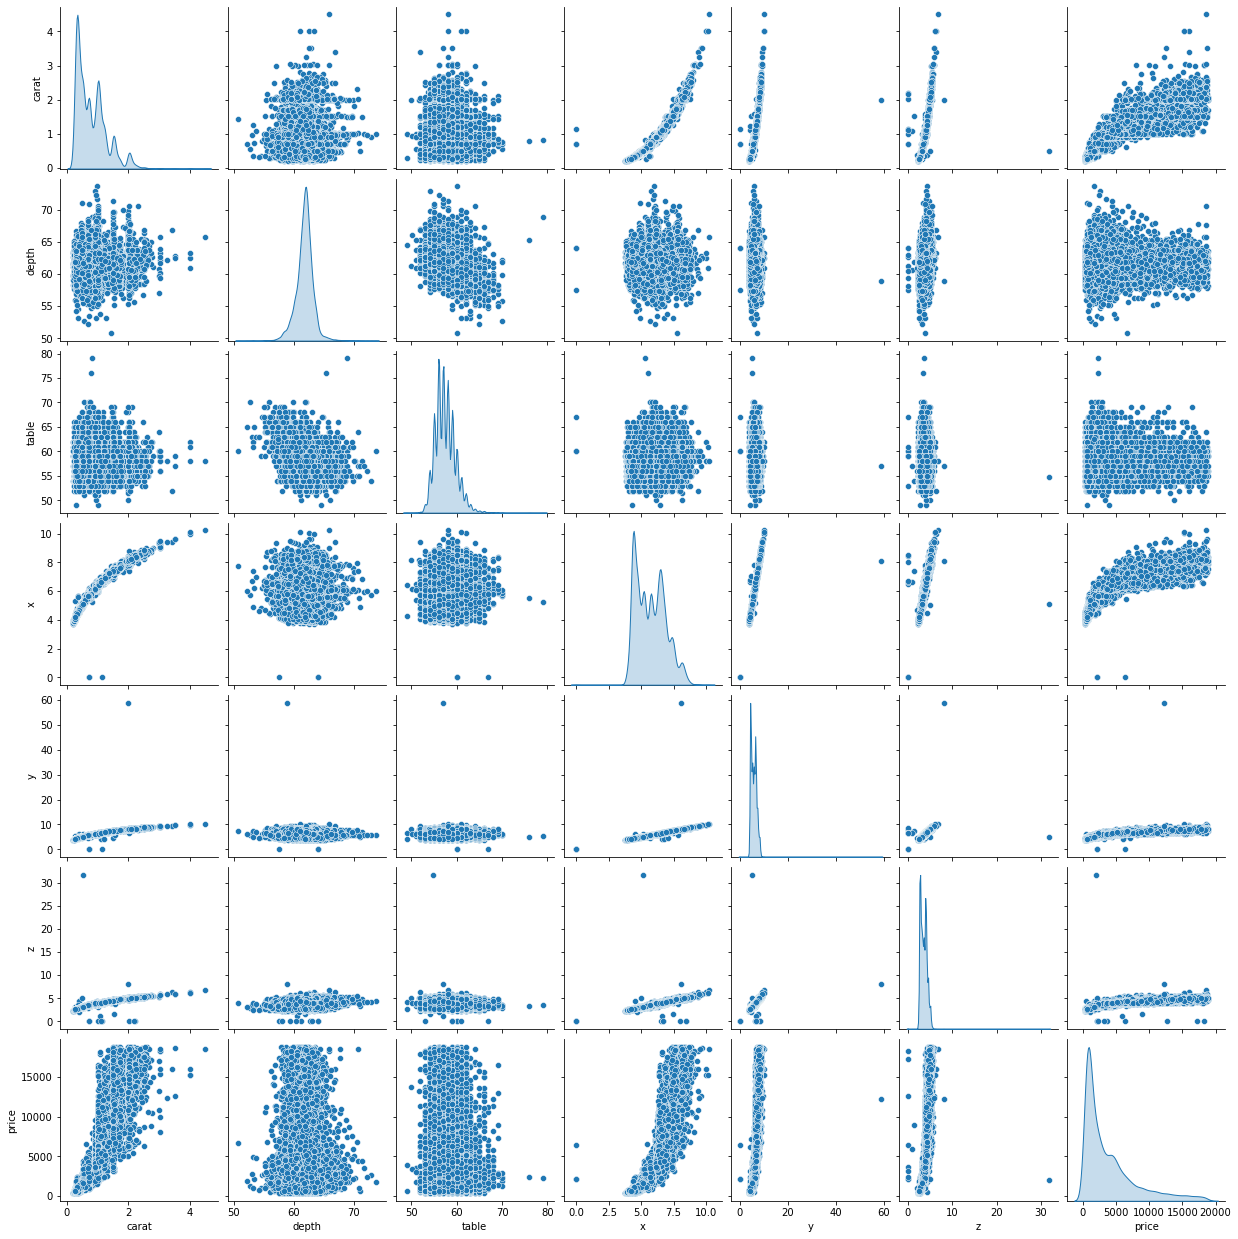

In [21]:
sns.pairplot(df, diag_kind='kde')  
plt.show()

**Checking for Correlations**

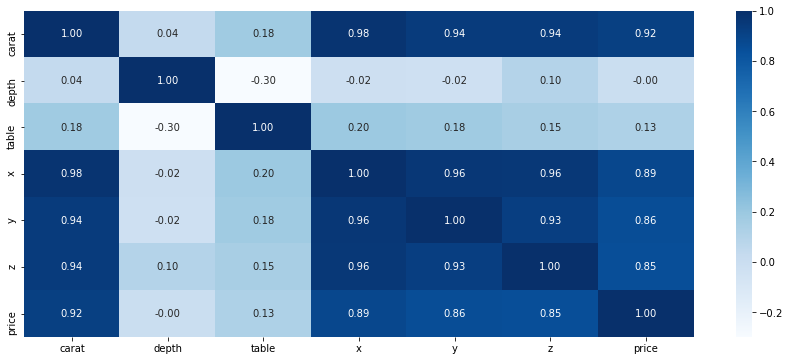

In [22]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, fmt = '.2f', cmap='Blues')
plt.show()

**1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?**

In [23]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

**The null values which are equal to zero**

In [24]:
df[df.isin([0])].stack(0)

5821   x    0.0
       y    0.0
       z    0.0
6034   z    0.0
6215   x    0.0
       y    0.0
       z    0.0
10827  z    0.0
12498  z    0.0
12689  z    0.0
17506  x    0.0
       y    0.0
       z    0.0
18194  z    0.0
23758  z    0.0
dtype: object

In [25]:
df.loc[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


**Null value and zero value treatment**

In [26]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [27]:
df.drop(df[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))].index, inplace=True)

In [28]:
df[df.isin([0])].stack(0)

Series([], dtype: object)

In [29]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [30]:
df.shape

(26958, 10)

**Sclaing of the entries**

In [31]:
sc = StandardScaler()

num_d = df.select_dtypes(exclude=['object']) # Only numeric entries

df[num_d.columns] = sc.fit_transform(num_d)  # update the columns with their normalized values

In [32]:
#df.head()

**Checking the outliers of the Scaled data**

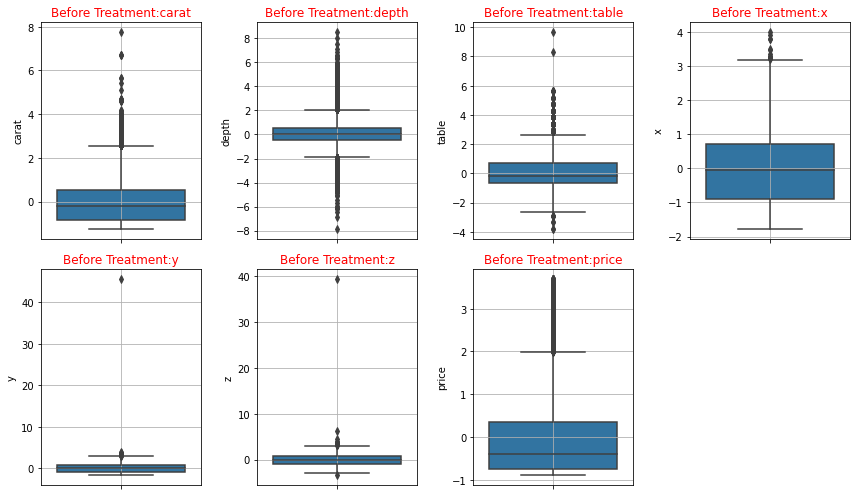

In [33]:
data_plot=df.drop(['color','clarity','cut'],axis=1)
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title('Before Treatment:'+ data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()

**Outlier treatment**

In [34]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [35]:
temp=['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [36]:
for column in df[temp].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

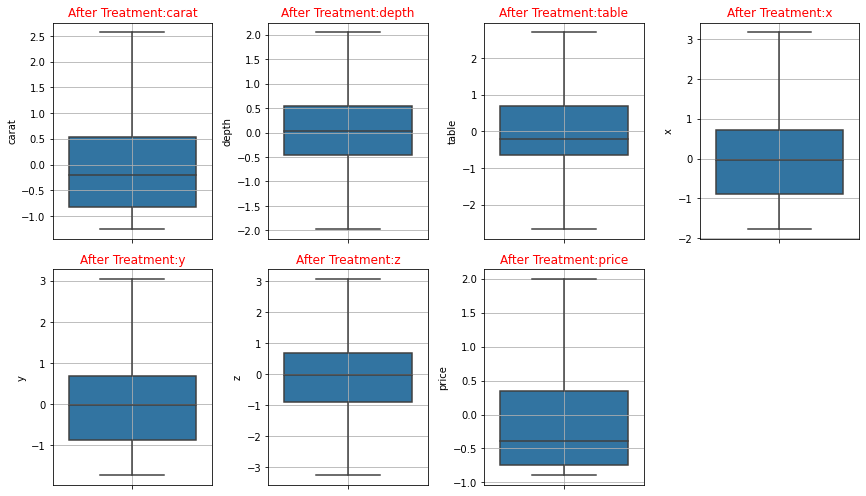

In [37]:
data_plot=df.drop(['color','clarity','cut'],axis=1)
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title('After Treatment:'+ data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()

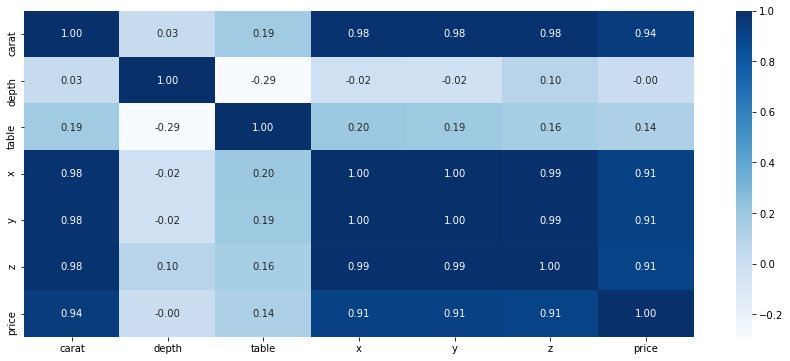

In [38]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, fmt = '.2f', cmap='Blues')
plt.show()

**1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.**

**One hot coding: To convert categorical variable into dummy/indicator variables.**

In [39]:
data_df = pd.get_dummies(df, columns=['cut','color','clarity'])
data_df.head()

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [40]:
data_df = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)

In [41]:
data_df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
data_df.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

**Splitting of the data into test and train (70:30) sets.**

In [43]:
X = data_df.drop('price', axis=1)
y = data_df[['price']]

In [44]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
y.head()

,price
0,-0.854851
1,-0.734303
2,0.584271
3,-0.709945
4,-0.785257


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [47]:
print('The dimension of X_train:', X_train.shape)
print('The dimension of X_test:', X_test.shape)
print('The dimension of y_train:', y_train.shape)
print('The dimension of y_test:', y_test.shape)

The dimension of X_train: (18870, 23)
The dimension of X_test: (8088, 23)
The dimension of y_train: (18870, 1)
The dimension of y_test: (8088, 1)


**Using Linear Model from Sci-kit learn library**

**Linear Regression Model**

In [48]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

**check the coefficient for the model**

In [49]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1009417847804563
The coefficient for depth is 0.005605143445571031
The coefficient for table is -0.013319500386804102
The coefficient for x is -0.3050434981963306
The coefficient for y is 0.3039144895792642
The coefficient for z is -0.1391657156798825
The coefficient for cut_Good is 0.09403402912977812
The coefficient for cut_Ideal is 0.152310746205674
The coefficient for cut_Premium is 0.1485277483984925
The coefficient for cut_Very Good is 0.12583881878452646
The coefficient for color_E is -0.0470544223336988
The coefficient for color_F is -0.06268437439142809
The coefficient for color_G is -0.1007216183835682
The coefficient for color_H is -0.2076731331166162
The coefficient for color_I is -0.3239541927462739
The coefficient for color_J is -0.4685893027501581
The coefficient for clarity_IF is 0.9997691394634901
The coefficient for clarity_SI1 is 0.638978581827133
The coefficient for clarity_SI2 is 0.4295966234831545
The coefficient for clarity_VS1 is 0

**check the intercept for the model**

In [50]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.7567627863049375


**R square on Splitted data (Score)**

In [51]:
print('Model score - R2 or The coefficient of determination of Train set',regression_model.score(X_train, y_train))

print('Model score - R2 or The coefficient of determination of Test set',regression_model.score(X_test, y_test))

Model score - R2 or The coefficient of determination of Train set 0.9419557931252712
Model score - R2 or The coefficient of determination of Test set 0.938164399810249


**Get the Predictions on Splitted Data**

In [52]:
a1 = regression_model.predict(X_train)
a2 = regression_model.predict(X_test)

**The RMSE on Splitted Data**

In [53]:
print("The Root Mean Square Error (RMSE) of the model is for Train dataset is",np.sqrt(mean_squared_error(y_train,regression_model.predict(X_train))))

print("The Root Mean Square Error (RMSE) of the model is for Test dataset is",np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for Train dataset is 0.20690072466418796
The Root Mean Square Error (RMSE) of the model is for Test dataset is 0.21647817772382885


**Check Multi-collinearity using VIF**

In [54]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [55]:
i=0
for column in X.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 33.35086119845924
depth ---> 4.573918951598611
table ---> 1.7728852812619147
x ---> 463.5542785436457
y ---> 462.769821646584
z ---> 238.65819968687333
cut_Good ---> 3.609618194943713
cut_Ideal ---> 14.348125081188464
cut_Premium ---> 8.623414379121153
cut_Very Good ---> 7.848451571723688
color_E ---> 2.3710704647626115
color_F ---> 2.32905271141246
color_G ---> 2.66936483727677
color_H ---> 2.202948077913144
color_I ---> 1.8698021546039962


**Using Statsmodels OLS**

In [56]:
#X_con=sm.add_constant(X)

In [57]:
X = data_df.drop('price', axis=1)
y = data_df[['price']]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

**Make the linear model using OLS**

**ITERATION 1**

In [59]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                          1.187e+04
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                        0.00
Time:                        18:14:42   Log-Likelihood:                          1908.9
No. Observations:               18870   AIC:                                     -3772.
Df Residuals:                   18847   BIC:                                     -3591.
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
carat             1.1101      0.010    116.309      0.000       1.091       1.129
depth             0.0049      0.004      1.251      0.211      -0.003       0.012
table            -0.0264      0.002    -12.014      0.000      -0.031      -0.022
x                -0.4521      0.034    -13.429      0.000      -0.518      -0.386
y                 0.5674      0.035     15.998      0.000       0.498       0.637
z                -0.2642      0.025    -10.376      0.000      -0.314      -0.214
cut_Good         -0.1303      0.010    -12.810      0.000      -0.150      -0.110
cut_Ideal        -0.0902      0.010     -9.392      0.000      -0.109      -0.071
cut_Premium      -0.0763      0.009     -8.176      0.000      -0.095      -0.058
cut_Very Good    -0.1052      0.010    -11.059      0.000      -0.124      -0.087
color_E          -0.1033      0.006    -17.923      0.000      -0.115      -0.092
color_F          -0.1215      0.006    -20.830      0.000      -0.133      -0.110
color_G          -0.1561      0.006    -27.408      0.000      -0.167      -0.145
color_H          -0.2662      0.006    -43.830      0.000      -0.278      -0.254
color_I          -0.3807      0.007    -56.014      0.000      -0.394      -0.367
color_J          -0.5249      0.008    -62.360      0.000      -0.541      -0.508
clarity_IF        0.5189      0.013     39.952      0.000       0.493       0.544
clarity_SI1       0.1596      0.010     16.509      0.000       0.141       0.179
clarity_SI2      -0.0498      0.010     -5.085      0.000      -0.069      -0.031
clarity_VS1       0.3597      0.010     35.559      0.000       0.340       0.380
clarity_VS2       0.2868      0.010     29.306      0.000       0.268       0.306
clarity_VVS1      0.4640      0.011     40.807      0.000       0.442       0.486
clarity_VVS2      0.4500      0.011     42.129      0.000       0.429       0.471
==============================================================================
Omnibus:                     3289.163   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23150.548
Skew:                           0.655   Prob(JB):                         0.00
Kurtosis:                       8.266   Cond. No.                         55.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
print('The variation in the independent variable which is explained by the dependent variable is',round(model.rsquared*100,4),'%')

The variation in the independent variable which is explained by the dependent variable is 93.5401 %


In [61]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.184654,1.114220,0.692304,-0.186479,-0.106356,-0.026801,0,0,0,1,...,0,0,0,0,0,1,0,0,0,-0.290884
8882,-1.043125,0.827280,0.244112,-1.295920,-1.222887,-1.169142,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.843667
22763,-0.205593,1.544631,0.692304,-0.079973,-0.114944,0.070716,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.394531
6643,-0.917495,-1.109569,-0.652273,-0.958650,-0.956637,-1.043763,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.710442
18701,1.804485,0.899015,-0.204081,1.526498,1.516910,1.630986,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1.233492


In [62]:
data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

In [63]:
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm1.params

Intercept       -0.756763
carat            1.100942
depth            0.005605
table           -0.013320
x               -0.305043
y                0.303914
z               -0.139166
cut_Good         0.094034
cut_Ideal        0.152311
cut_Premium      0.148528
cut_Very_Good    0.125839
color_E         -0.047054
color_F         -0.062684
color_G         -0.100722
color_H         -0.207673
color_I         -0.323954
color_J         -0.468589
clarity_IF       0.999769
clarity_SI1      0.638979
clarity_SI2      0.429597
clarity_VS1      0.838088
clarity_VS2      0.766024
clarity_VVS1     0.942077
clarity_VVS2     0.931367
dtype: float64

In [64]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.330e+04
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:14:43   Log-Likelihood:                 2954.6
No. Observations:               18870   AIC:                            -5861.
Df Residuals:                   18846   BIC:                            -5673.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7568      0.016    -46.999

**Sum of squared errors by predicting value of Dependent variable**

In [65]:
mse_test= np.mean((regression_model.predict(X_test)-y_test)**2)

mse_train= np.mean((regression_model.predict(X_train)-y_train)**2)

In [66]:
print('The RMSE of Tets data:',math.sqrt(mse_test))
print('The RMSE of Train data:',math.sqrt(mse_train))

The RMSE of Tets data: 0.21647817772382866
The RMSE of Train data: 0.20690072466418796


**Model score - R2**

In [67]:
regression_model.score(X_test, y_test)

0.938164399810249

In [68]:
regression_model.score(X_train, y_train)

0.9419557931252712

In [69]:
y_pred = regression_model.predict(X_test)


In [70]:
a = y_test['price']
a

26809    0.122708
10087    0.082442
22817   -0.689067
21676   -0.272740
14846    0.642930
           ...   
25803   -0.270006
8919    -0.207122
19048    1.315017
2456     1.998165
2266    -0.689315
Name: price, Length: 8088, dtype: float64

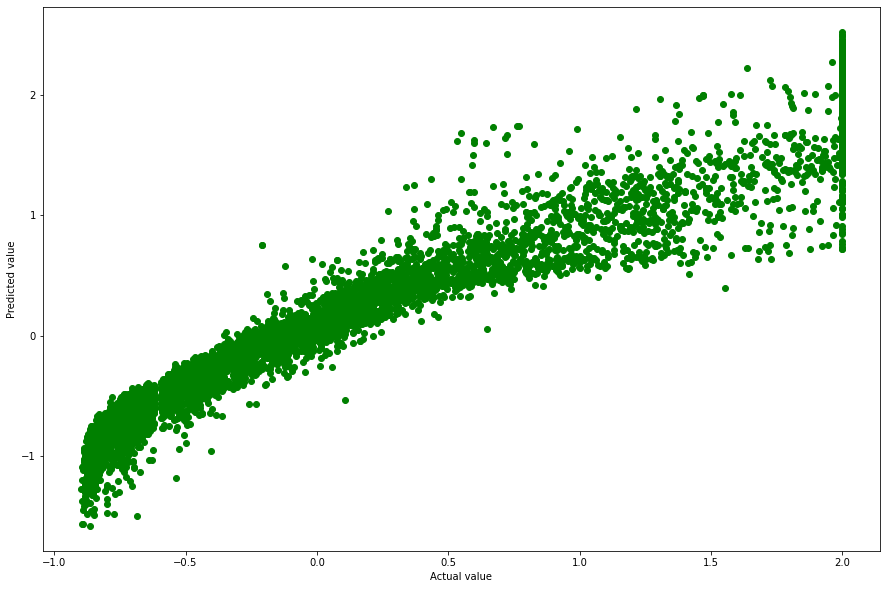

In [71]:
plt.figure(figsize = (15,10))
plt.scatter(y_test['price'], y_pred, c="g", alpha=1)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.show()

**ITERATION 2**

In [72]:
X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [73]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [74]:
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.2340452832654498
The coefficient for depth is 0.005683622106287117
The coefficient for table is -0.0149251587112046
The coefficient for x is -0.3535933711080532
The coefficient for y is 0.3384887509047455
The coefficient for z is -0.15656211567595657
The coefficient for cut_Good is 0.031556866176339585
The coefficient for cut_Ideal is 0.08694572471513118
The coefficient for cut_Premium is 0.07498269130660604
The coefficient for cut_Very Good is 0.06147454615239573
The coefficient for color_E is -0.0211140476679461
The coefficient for color_F is -0.02768408741673726
The coefficient for color_G is -0.04786927020083577
The coefficient for color_H is -0.08724911377113771
The coefficient for color_I is -0.1149318114675435
The coefficient for color_J is -0.12223629418165737
The coefficient for clarity_IF is 0.20897527243289732
The coefficient for clarity_SI1 is 0.31958216540655066
The coefficient for clarity_SI2 is 0.1872071725963308
The coefficient for clarity

In [75]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.473986556018693e-17


In [76]:
data_train_scaled = pd.concat([X_train_scaled, y_train_scaled], axis=1)
data_train_scaled.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.176264,1.269677,0.735568,-0.182658,-0.105231,-0.022493,-0.317195,-0.819294,-0.578778,1.840199,...,-0.339870,-0.236558,-0.185695,-0.568171,-0.450026,2.350990,-0.539164,-0.26953,-0.32363,-0.276664
8882,-1.068082,0.940165,0.269820,-1.297156,-1.272566,-1.204877,-0.317195,-0.819294,-0.578778,1.840199,...,-0.339870,-0.236558,-0.185695,-0.568171,-0.450026,-0.425353,1.854724,-0.26953,-0.32363,-0.920346
22763,-0.198016,1.763944,0.735568,-0.075666,-0.114210,0.078442,3.152639,-0.819294,-0.578778,-0.543420,...,-0.339870,-0.236558,-0.185695,-0.568171,-0.450026,-0.425353,1.854724,-0.26953,-0.32363,-0.397354
6643,-0.937572,-1.284039,-0.661675,-0.958349,-0.994201,-1.075103,-0.317195,1.220563,-0.578778,-0.543420,...,-0.339870,-0.236558,-0.185695,-0.568171,-0.450026,-0.425353,1.854724,-0.26953,-0.32363,-0.765214
18701,1.890142,1.022543,-0.195927,1.538127,1.591895,1.693406,-0.317195,-0.819294,-0.578778,1.840199,...,2.942297,-0.236558,-0.185695,1.760034,-0.450026,-0.425353,-0.539164,-0.26953,-0.32363,1.498382


In [77]:
data_train_scaled.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

In [78]:
lm2 = smf.ols(formula= 'price ~ carat+table+x+y+z+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train_scaled).fit()
lm2.params

Intercept        6.765422e-17
carat            1.235180e+00
table           -1.560693e-02
x               -3.658493e-01
y                3.156624e-01
z               -1.223879e-01
cut_Good         3.192228e-02
cut_Ideal        8.629636e-02
cut_Premium      7.439088e-02
cut_Very_Good    6.131590e-02
color_E         -2.114071e-02
color_F         -2.770287e-02
color_G         -4.783846e-02
color_H         -8.720483e-02
color_I         -1.148377e-01
color_J         -1.221941e-01
clarity_IF       2.090331e-01
clarity_SI1      3.199949e-01
clarity_SI2      1.874681e-01
clarity_VS1      3.517328e-01
clarity_VS2      3.729318e-01
clarity_VVS1     2.757397e-01
clarity_VVS2     3.178890e-01
dtype: float64

In [79]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.390e+04
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:14:44   Log-Likelihood:                 80.669
No. Observations:               18870   AIC:                            -115.3
Df Residuals:                   18847   BIC:                             65.10
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.765e-17      0.002   3.85e-14

**Sum of squared errors by predicting value of Dependent variable**

In [80]:
mse_test_scaled = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)
mse_train_scaled = np.mean((regression_model.predict(X_train_scaled)-y_train_scaled)**2)

In [81]:
print('The RMSE of Test data:',math.sqrt(mse_test_scaled))
print('The RMSE of Train data:',math.sqrt(mse_train_scaled))

The RMSE of Test data: 0.248608869889446
The RMSE of Train data: 0.24092365362232265


**Model score - R2 or coeff of determinant**

In [82]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9381936298122924

In [83]:
regression_model.score(X_train_scaled, y_train_scaled)

0.9419557931252712

In [84]:
y_pred_scaled = regression_model.predict(X_test_scaled)

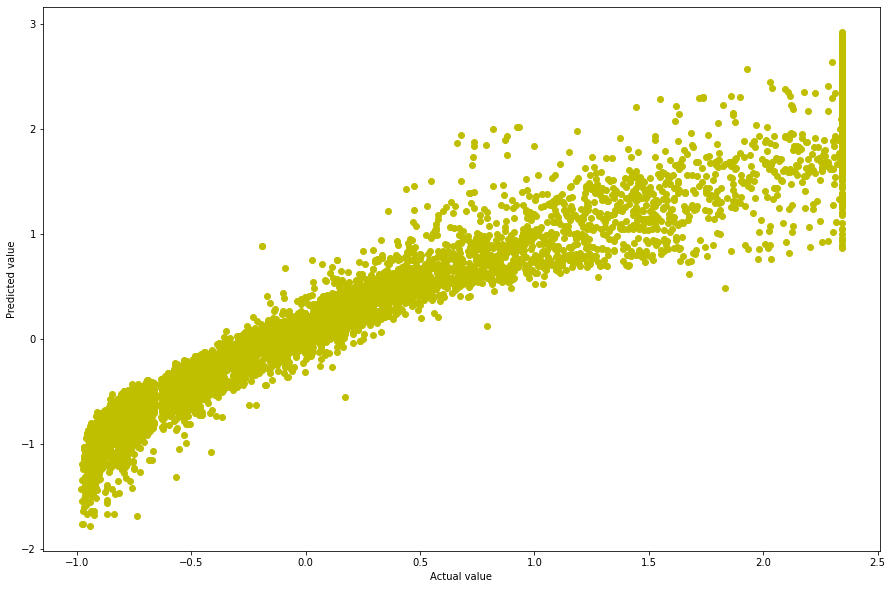

In [85]:
#plt.scatter(y_test_scaled['price'], y_pred)

plt.figure(figsize = (15,10))
plt.scatter(y_test_scaled['price'], y_pred_scaled, c="y", alpha=1)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.show()

In [86]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [87]:
i=0
for column in X.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 33.35086119845924
depth ---> 4.573918951598611
table ---> 1.7728852812619147
x ---> 463.5542785436457
y ---> 462.769821646584
z ---> 238.65819968687333
cut_Good ---> 3.609618194943713
cut_Ideal ---> 14.348125081188464
cut_Premium ---> 8.623414379121153
cut_Very Good ---> 7.848451571723688
color_E ---> 2.3710704647626115
color_F ---> 2.32905271141246
color_G ---> 2.66936483727677
color_H ---> 2.202948077913144
color_I ---> 1.8698021546039962


In [88]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (1.24) * carat + (-0.02) * table + (-0.37) * x + (0.32) * y + (-0.12) * z + (0.03) * cut_Good + (0.09) * cut_Ideal + (0.07) * cut_Premium + (0.06) * cut_Very_Good + (-0.02) * color_E + (-0.03) * color_F + (-0.05) * color_G + (-0.09) * color_H + (-0.11) * color_I + (-0.12) * color_J + (0.21) * clarity_IF + (0.32) * clarity_SI1 + (0.19) * clarity_SI2 + (0.35) * clarity_VS1 + (0.37) * clarity_VS2 + (0.28) * clarity_VVS1 + (0.32) * clarity_VVS2 + 

# Problem 2

**A tour and travel agency deals in selling holiday packages. Details of 872 employees of a company are given. Among these employees, some opted for the package and some didn't. The eobjective of the problem is to predict whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.**

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

**Data Dictionary**

In [90]:
dd2 = pd.read_csv('Problem2_DD.csv')
dd2

,Variable Name,Description
0,Holiday_Package�,�Opted for Holiday Package yes/no?
1,Salary�,�Employee salary
2,age�,�Age in years
3,edu�,�Years of formal education
4,no_young_children�,�The number of young children (younger than 7 ...
5,no_older_children�,�Number of older children
6,foreign�,�foreigner Yes/No


**2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.**

In [91]:
df1 = pd.read_csv('Holiday_Package.csv')

In [92]:
df1.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [93]:
df1 = df1.drop('Unnamed: 0', axis = 1)
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [94]:
df1.tail()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes
871,no,74659,51,10,0,0,yes


**Checking the data type and the shape of the dataset**

In [95]:
df1.shape

(872, 7)

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


**Data Description**

In [97]:
df1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Checking if any Null/Missing values in the dataset**

In [98]:
df1.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

**Checking duplicate entries if any present in the dataset**

In [99]:
print('The number of duplicate entries in the dataset is:', df1.duplicated().sum())

The number of duplicate entries in the dataset is: 0


**unique values for categorical and numerical variables**

In [100]:
for column in df1.columns:
    if df1[column].dtype == 'object':
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [101]:
df1[['Salary','age','educ','no_young_children','no_older_children']].nunique()

Salary               864
age                   43
educ                  20
no_young_children      4
no_older_children      7
dtype: int64

**Univariate / Bivariate analysis**

**For Numerical Variables**

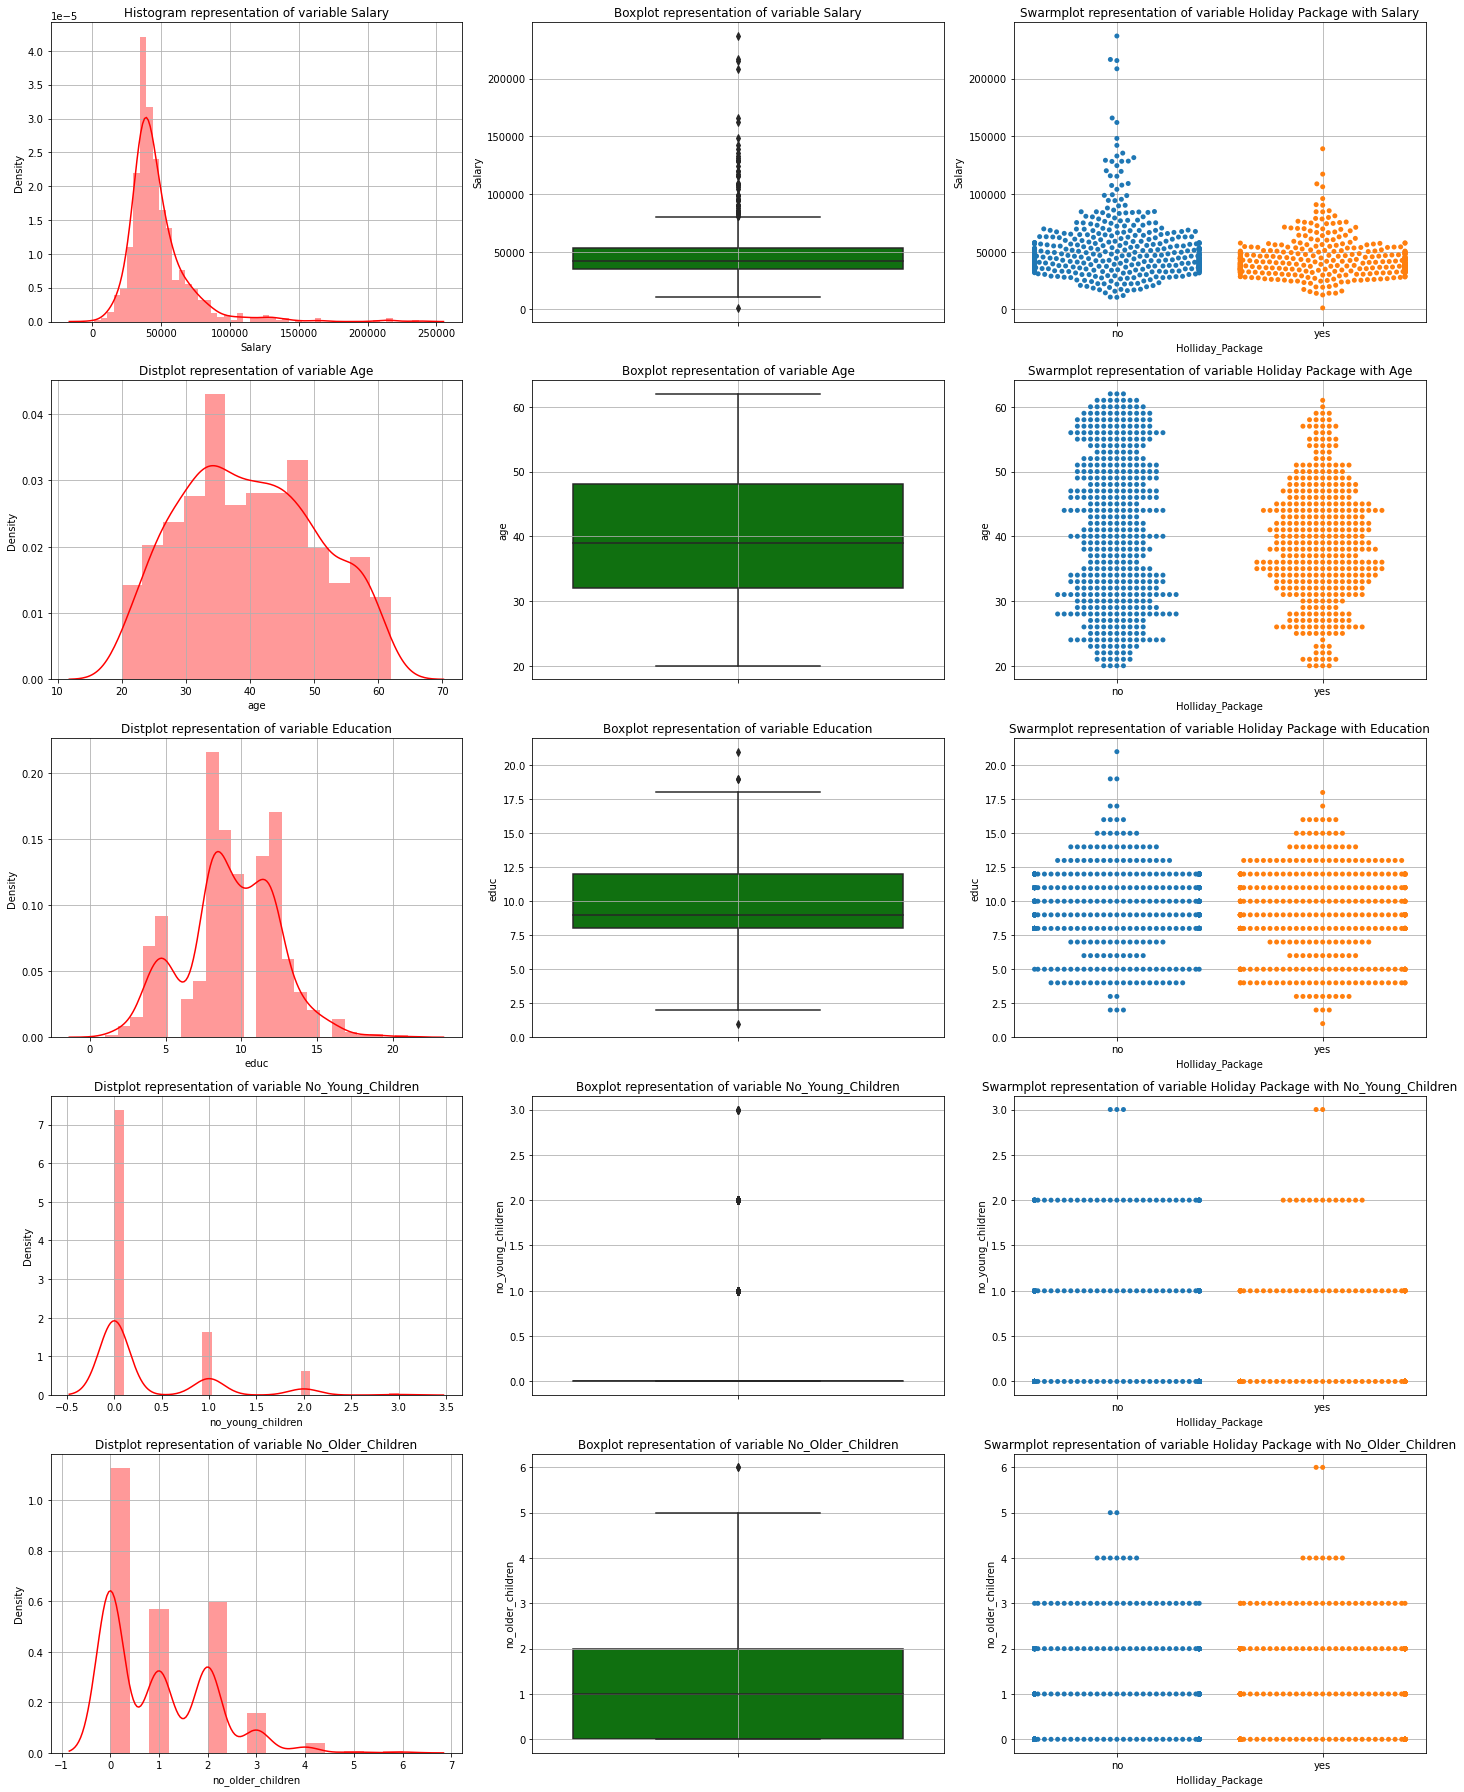

In [102]:
plt.figure(figsize = (20,25))

plt.subplot(5,3,1)
sns.distplot(df1.Salary, color = 'red')
plt.title('Histogram representation of variable Salary')
plt.grid()
plt.subplot(5,3,2)
sns.boxplot(y=df1['Salary'], color = 'g')
plt.title('Boxplot representation of variable Salary')
plt.grid()
plt.subplot(5,3,3)
sns.swarmplot(x='Holliday_Package', y='Salary', data=df1)
plt.title('Swarmplot representation of variable Holiday Package with Salary')
plt.grid()

#---------------------------------------------------------------------------------

plt.subplot(5,3,4)
sns.distplot(df1.age, color = 'red')
plt.title('Distplot representation of variable Age')
plt.grid()
plt.subplot(5,3,5)
sns.boxplot(y=df1['age'], color = 'g')
plt.title('Boxplot representation of variable Age')
plt.grid()
plt.subplot(5,3,6)
sns.swarmplot(x='Holliday_Package', y='age', data=df1)
plt.title('Swarmplot representation of variable Holiday Package with Age')
plt.grid()

#--------------------------------------------------------------------------------

plt.subplot(5,3,7)
sns.distplot(df1.educ, color = 'red')
plt.title('Distplot representation of variable Education')
plt.grid()
plt.subplot(5,3,8)
sns.boxplot(y=df1['educ'], color = 'g')
plt.title('Boxplot representation of variable Education')
plt.grid()
plt.subplot(5,3,9)
sns.swarmplot(x='Holliday_Package', y='educ', data=df1)
plt.title('Swarmplot representation of variable Holiday Package with Education')
plt.grid()

#--------------------------------------------------------------------------------

plt.subplot(5,3,10)
sns.distplot(df1.no_young_children, color = 'red')
plt.title('Distplot representation of variable No_Young_Children')
plt.grid()
plt.subplot(5,3,11)
sns.boxplot(y=df1['no_young_children'], color = 'g')
plt.title('Boxplot representation of variable No_Young_Children')
plt.grid()
plt.subplot(5,3,12)
sns.swarmplot(x='Holliday_Package', y='no_young_children', data=df1)
plt.title('Swarmplot representation of variable Holiday Package with No_Young_Children')
plt.grid()

#--------------------------------------------------------------------------------

plt.subplot(5,3,13)
sns.distplot(df1.no_older_children, color = 'red')
plt.title('Distplot representation of variable No_Older_Children')
plt.grid()
plt.subplot(5,3,14)
sns.boxplot(y=df1['no_older_children'], color = 'g')
plt.title('Boxplot representation of variable No_Older_Children')
plt.grid()
plt.subplot(5,3,15)
sns.swarmplot(x='Holliday_Package', y='no_older_children', data=df1)
plt.title('Swarmplot representation of variable Holiday Package with No_Older_Children')
plt.grid()

plt.tight_layout()
plt.show()

In [103]:
df1.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

**For Categorical Variables**

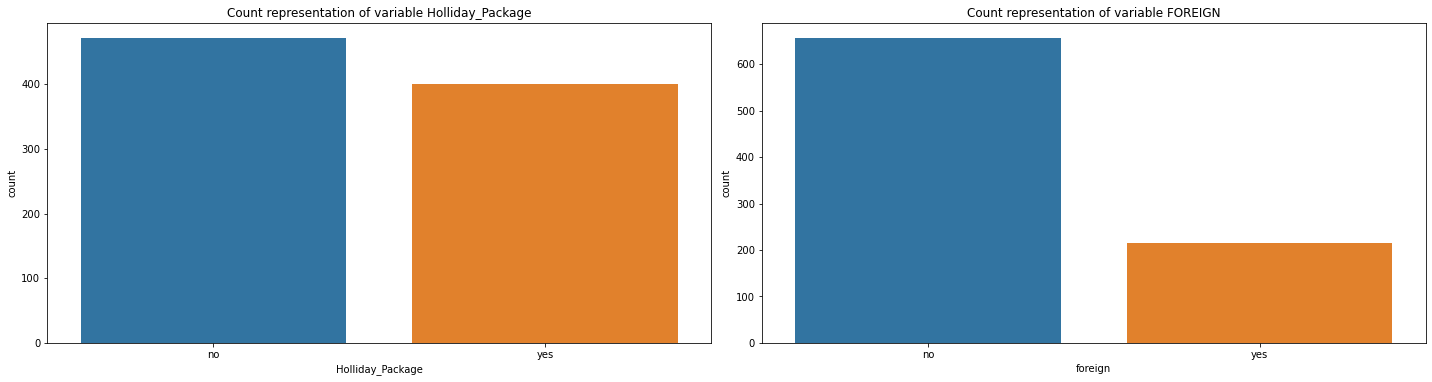

In [104]:
plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
sns.countplot(df1['Holliday_Package'])
plt.title('Count representation of variable Holliday_Package')

plt.subplot(2,2,2)
sns.countplot(df1['foreign'])
plt.title('Count representation of variable FOREIGN')

plt.tight_layout()
plt.show()

**Checking the target data distribution amongst the various values**

In [152]:
print('The percentage of employee opt the holiday package:',df1.Holliday_Package.value_counts()[1]/df1.Holliday_Package.count())

print('The percentage of employee do not opt the holiday package:',df1.Holliday_Package.value_counts()[0]/df1.Holliday_Package.count())

The percentage of employee opt the holiday package: 0.4598623853211009
The percentage of employee do not opt the holiday package: 0.5401376146788991


In [153]:
print('The percentage of employee opt the foreign trip:',df1.foreign.value_counts()[1]/df1.foreign.count())

print('The percentage of employee do not opt foreign trip:',df1.foreign.value_counts()[0]/df1.foreign.count())

The percentage of employee opt the foreign trip: 0.24770642201834864
The percentage of employee do not opt foreign trip: 0.7522935779816514


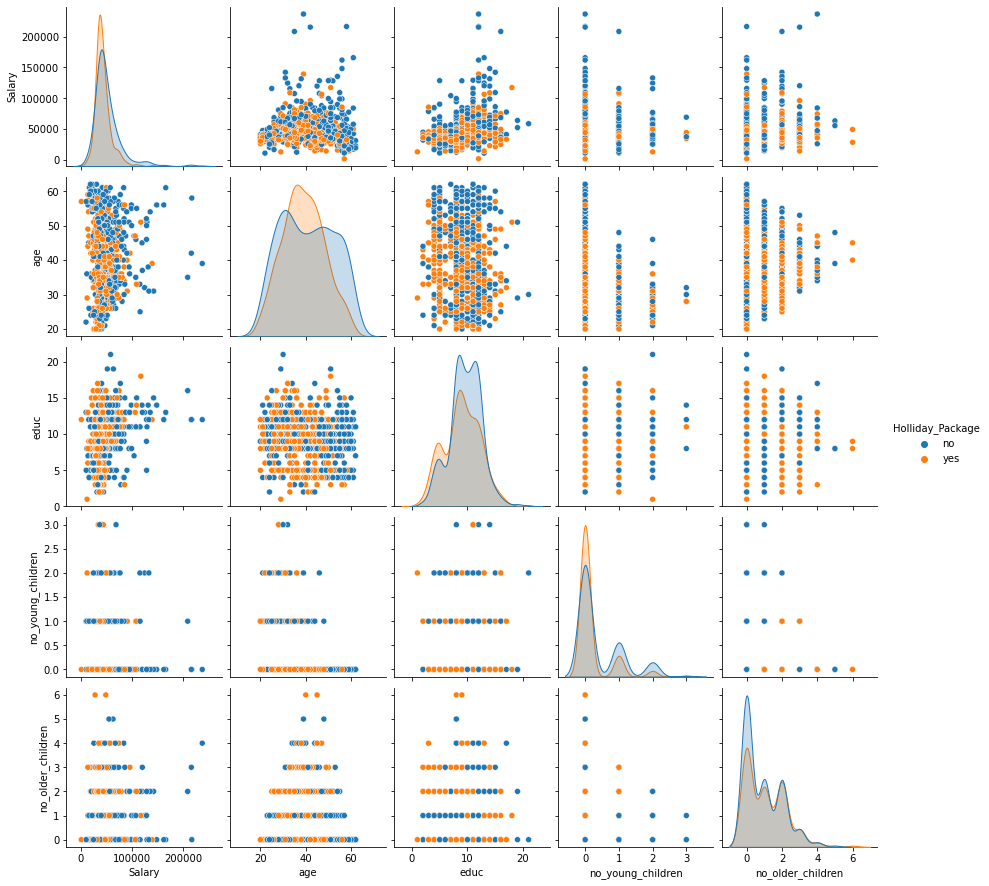

In [106]:
sns.pairplot(df1, diag_kind='kde', hue = 'Holliday_Package')  
plt.show()

**Checking correlation**

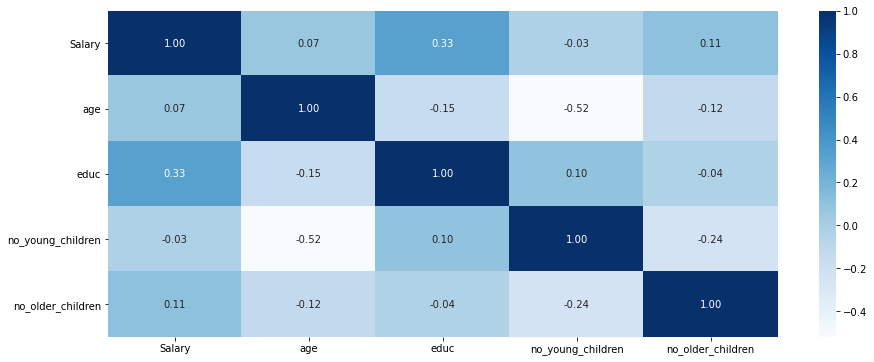

In [107]:
plt.figure(figsize=(15,6))
sns.heatmap(df1.corr(), annot=True, fmt = '.2f', cmap='Blues')
plt.show()

**Outliers treatment**

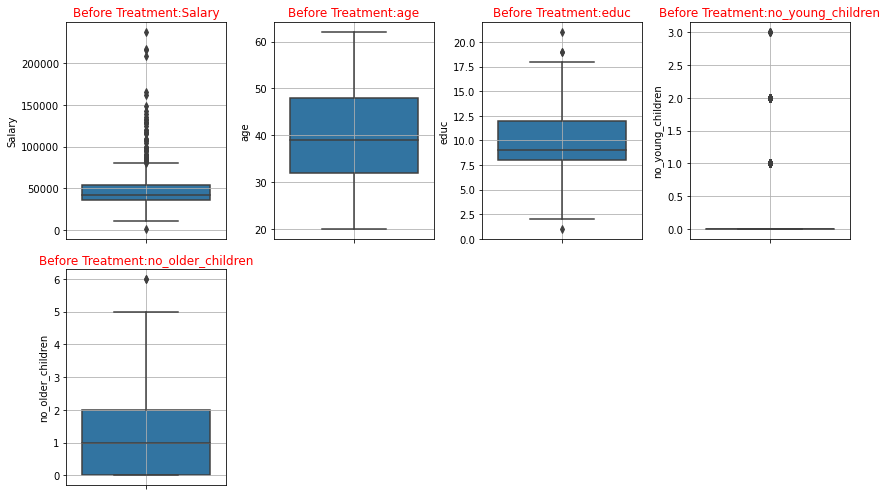

In [108]:
data1_plot=df1.drop(['Holliday_Package','foreign'],axis=1)
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data1_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data1_plot[data1_plot.columns[i]])
    ax.set_title('Before Treatment:'+ data1_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()

In [109]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [110]:
temp1 = ['Salary','age','educ','no_young_children','no_older_children']

In [111]:
for column in df1[temp1].columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

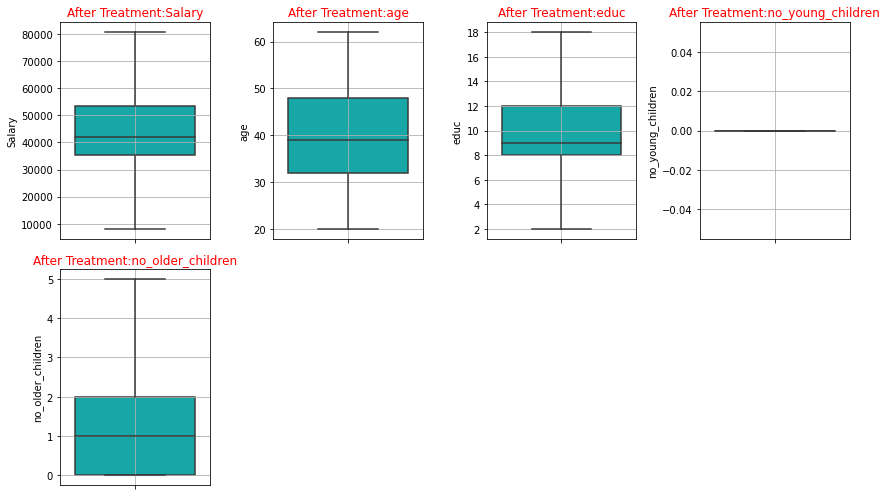

In [112]:
data1_plot=df1.drop(['Holliday_Package','foreign'],axis=1)
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data1_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data1_plot[data1_plot.columns[i]], color = 'c')
    ax.set_title('After Treatment:'+ data1_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()

In [113]:
df2 = df1.copy()

**2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).**

In [114]:
data2 = pd.get_dummies(df2, columns=['Holliday_Package','foreign'], drop_first = True)

In [154]:
data2.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


In [155]:
data2.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'Holliday_Package_yes', 'foreign_yes'],
      dtype='object')

**Splitting of datasets**

In [116]:
XX = data2.drop('Holliday_Package_yes', axis=1)
yy = data2['Holliday_Package_yes']

In [117]:
XX.head()

,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0
1,37207.0,45.0,8.0,0.0,1.0,0
2,58022.0,46.0,9.0,0.0,0.0,0
3,66503.0,31.0,11.0,0.0,0.0,0
4,66734.0,44.0,12.0,0.0,2.0,0


In [118]:
yy.head()

0    0
1    1
2    0
3    0
4    0
Name: Holliday_Package_yes, dtype: uint8

In [119]:
Xx_train, Xx_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.30 , random_state=1)

In [120]:
yy_train.value_counts(1)

0    0.534426
1    0.465574
Name: Holliday_Package_yes, dtype: float64

In [121]:
yy_test.value_counts(1)

0    0.553435
1    0.446565
Name: Holliday_Package_yes, dtype: float64

**Logistic Regression**

In [122]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [123]:
model = LogisticRegression(max_iter=10000,n_jobs=2)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [124]:
grid_search.fit(Xx_train, yy_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [125]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-06} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=1e-06)


In [126]:
best_model = grid_search.best_estimator_

**Prediction on Training and Test dataset**

In [127]:
yytrain_predict = best_model.predict(Xx_train)
yytest_predict = best_model.predict(Xx_test)

In [128]:
yytrain_predict

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,

**Getting the Predicted Classes and Probs on test set**

In [129]:
yytest_predict_prob=best_model.predict_proba(Xx_test)
pd.DataFrame(yytest_predict_prob).head()

,0,1
0,0.694203,0.305797
1,0.338426,0.661574
2,0.614074,0.385926
3,0.685575,0.314425
4,0.359313,0.640687


**Model Evaluation: Accuracy (Training Data & Test Data)**

In [130]:
best_model.score(Xx_train, yy_train)
best_model.score(Xx_test, yy_test)

print('The accuracy of the Training set:', best_model.score(Xx_train, yy_train))
print('The accuracy of the Test set:', best_model.score(Xx_test, yy_test))

The accuracy of the Training set: 0.6442622950819672
The accuracy of the Test set: 0.6297709923664122


**Confusion matrix :Training Set**

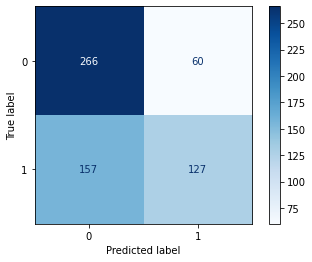

In [131]:
confusion_matrix(yy_train, yytrain_predict)
plot_confusion_matrix(best_model,Xx_train,yy_train, cmap = 'Blues');

**Confusion matrix : Test Set**

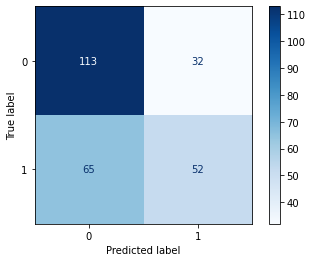

In [132]:
confusion_matrix(yy_test, yytest_predict)
plot_confusion_matrix(best_model,Xx_test,yy_test, cmap = 'Blues');

**Classification report on Training and Test sets**

In [133]:
print('Training set:')
print(classification_report(yy_train, yytrain_predict));
print('------------------------------------------------------','\n')
print('Test set:')
print(classification_report(yy_test, yytest_predict));

Training set:
              precision    recall  f1-score   support

           0       0.63      0.82      0.71       326
           1       0.68      0.45      0.54       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610

------------------------------------------------------ 

Test set:
              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262



**AUC and ROC**

**Training Set**

AUC of Training set: 0.666
AUC of Test set: 0.662


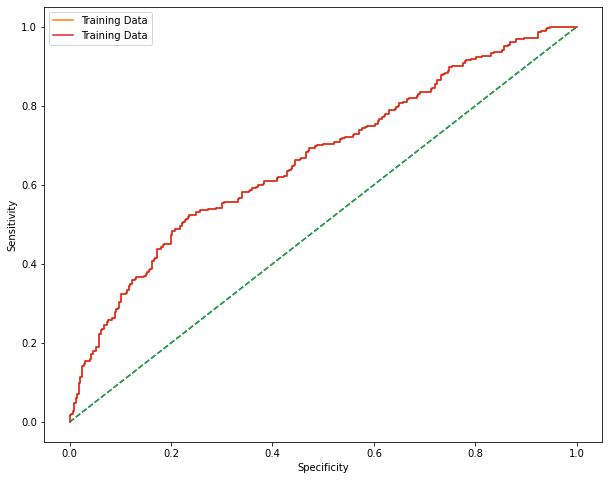

In [159]:
plt.figure(figsize = (10,8))

# predict probabilities
probs = best_model.predict_proba(Xx_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
lr_train_auc = roc_auc_score(yy_train, probs)
print('AUC of Training set: %.3f' % lr_train_auc)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(yy_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label = 'Training Data');

#------------------------------------------------------------

probs = best_model.predict_proba(Xx_test)


probs = probs[:, 1]


lr_test_auc = roc_auc_score(yy_test, probs)
print('AUC of Test set: %.3f' % lr_test_auc)


test_fpr, test_tpr, test_thresholds = roc_curve(yy_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr,label = 'Training Data');
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc='best')
plt.show()

**Linear Discriminant Analysis**

In [135]:
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30.0,8.0,0.0,1.0,no
1,yes,37207.0,45.0,8.0,0.0,1.0,no
2,no,58022.0,46.0,9.0,0.0,0.0,no
3,no,66503.0,31.0,11.0,0.0,0.0,no
4,no,66734.0,44.0,12.0,0.0,2.0,no


In [136]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


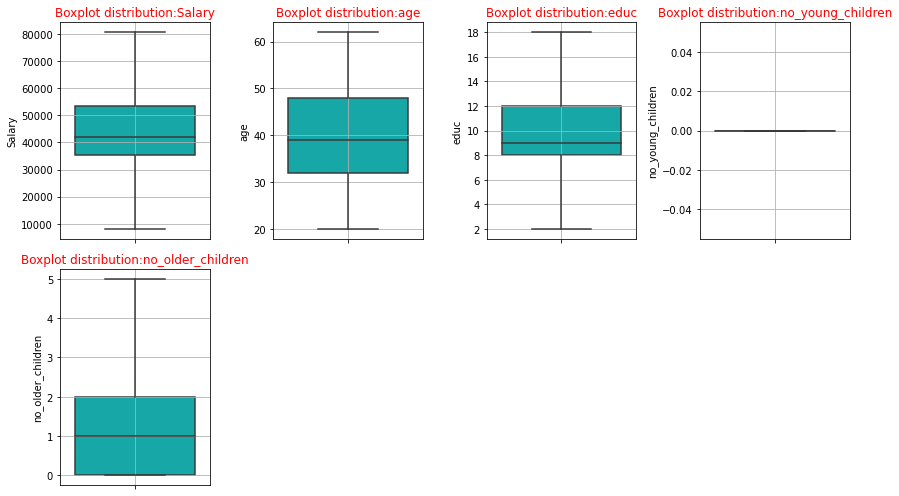

In [137]:
data1_plot=df1.drop(['Holliday_Package','foreign'],axis=1)

fig=plt.figure(figsize=(12,7))
for i in range(0,len(data1_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data1_plot[data1_plot.columns[i]], color = 'c')
    ax.set_title('Boxplot distribution:'+ data1_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()

In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    int8   
dtypes: float64(5), int8(2)
memory usage: 35.9 KB


In [139]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(Xx_train,yy_train)

**Prediction on Training and Test dataset**

In [140]:
pred_class_train = model.predict(Xx_train)  # For Training Data
pred_class_test = model.predict(Xx_test)    # For Test Data

**Probability Prediction**

In [141]:
pred_prob_train = model.predict_proba(Xx_train)  # For Training Data
pred_prob_test = model.predict_proba(Xx_test)    # For Test Data

**Model Evaluation: Accuracy (Training Data & Test Data)**

In [142]:
model.score(Xx_train,yy_train)    # For Training Data
model.score(Xx_test,yy_test)       # For Test Data

print('The accuracy of the Training set:', model.score(Xx_train,yy_train))
print('The accuracy of the Test set:', model.score(Xx_test,yy_test))

The accuracy of the Training set: 0.6426229508196721
The accuracy of the Test set: 0.6297709923664122


**Confusion matrix :Training Set**

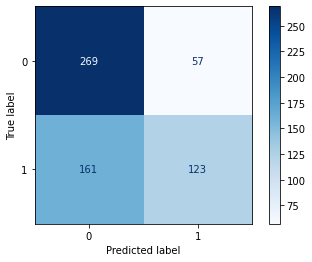

In [143]:
confusion_matrix(yy_train, pred_class_train)
plot_confusion_matrix(model,Xx_train,yy_train, cmap = 'Blues');

**Confusion matrix :Test Set**

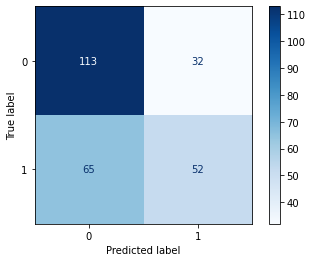

In [144]:
confusion_matrix(yy_test, pred_class_test)
plot_confusion_matrix(model,Xx_test,yy_test, cmap = 'Blues');

**Classification report on Training and Test sets**

In [145]:
print('Training set:')
print(classification_report(yy_train, pred_class_train));
print('------------------------------------------------------','\n')
print('Test set:')
print(classification_report(yy_test, pred_class_test));

Training set:
              precision    recall  f1-score   support

           0       0.63      0.83      0.71       326
           1       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610

------------------------------------------------------ 

Test set:
              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262



**AUC and ROC**

AUC for the Training Data: 0.667
AUC for the Test Data: 0.662


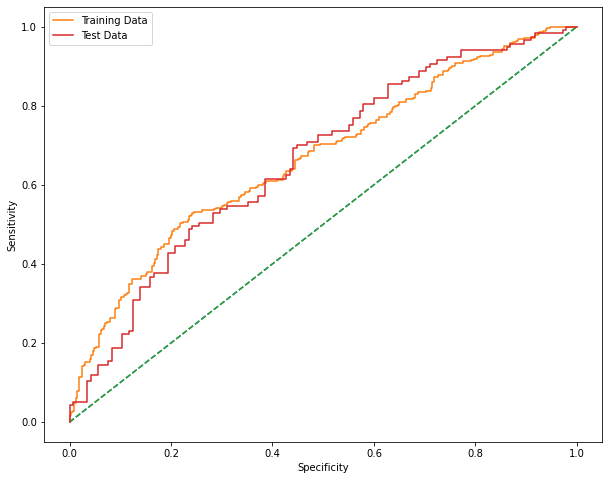

In [158]:
plt.figure(figsize = (10,8))

lda_train_auc = metrics.roc_auc_score(yy_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

fpr, tpr, thresholds = metrics.roc_curve(yy_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, label = 'Training Data');

#------------------------------------------------------------
lda_test_auc = metrics.roc_auc_score(yy_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)


fpr, tpr, thresholds = metrics.roc_curve(yy_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr,label='Test Data')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc='best')
plt.show()